## Evaluacion de modelos

Librerias

In [1]:
# Carga de librerias
from IPython.display import display
import subprocess as sp
import numpy as np
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import rcParams
from sklearn.metrics import r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
import random
import time
from datetime import datetime
import datetime
from scipy import stats
import statsmodels.api as sm
import holidays
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler , MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split

#Modelos
from sklearn import svm
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import pickle



### XGBoosting

In [2]:
dataset =  pd.read_csv('data/analytics/datasetEstudio-2020-2024MuestraEscalados.csv')
dataset.head()

,edad,anio,dia,mes,sector_ips,NombreIPS,estacion,atenciones_por_dia,pm25,dia_semana,festivo,temperatura,humedad,presion,p1,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna
0,0.816667,1.00,0.200000,0.454545,1.0,0.833333,1.0,0.021028,0.103545,1.0,0.0,0.762202,0.508594,0.790541,0.015789,0.376543,0.413793,0.007042,0.004032,0.0
1,0.358333,0.75,0.333333,0.363636,1.0,0.256410,1.0,0.011682,0.166548,1.0,0.0,0.637591,0.494922,0.702704,0.010526,0.135802,0.172414,0.510563,0.584677,0.0
2,0.700000,0.75,1.000000,0.545455,0.5,0.846154,0.5,0.007009,0.047407,0.5,0.0,0.720146,0.375000,0.318244,0.005263,0.432099,0.448276,0.292254,0.612903,0.5
3,0.541667,0.50,0.033333,0.636364,0.5,0.935897,0.5,0.032710,0.204610,0.5,0.0,0.084112,0.941406,0.298647,0.084211,0.259259,0.137931,0.598592,0.673387,0.5
4,0.016667,0.25,0.666667,1.000000,1.0,0.525641,1.0,0.009346,0.332200,0.5,0.0,0.478712,0.604492,0.656082,0.005263,0.135802,0.206897,0.478873,0.564516,0.0


Mean Squared Error (MSE): 0.0002671084987760626
Root Mean Squared Error (RMSE): 0.016343454309786003
R-squared (R2): 0.9852698460256377


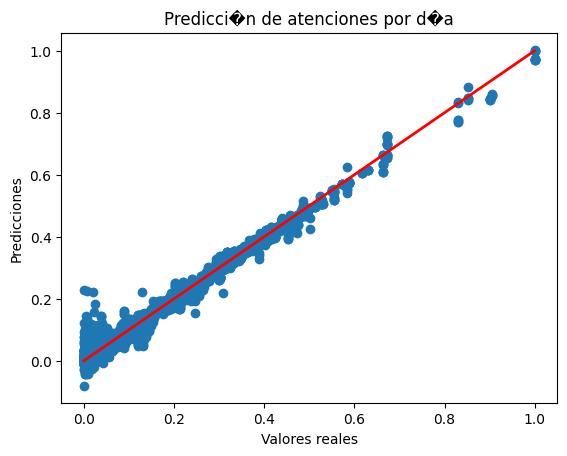

In [3]:
X = dataset.drop('atenciones_por_dia', axis=1)
y = dataset['atenciones_por_dia']
# Separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Se importa libreria para realizar modelo de XGBOOST

from xgboost import XGBRegressor

# Definir el modelo
model = XGBRegressor()
# Entrenar el modelo
model.fit(X_train, y_train)
# Predecir valores
y_pred = model.predict(X_test)
# Calcular el error cuadr�tico medio

#Metricas del modelo SVM
from sklearn.metrics import mean_absolute_error


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
#Metricas mae
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')
# Graficar la predicci�n vs el valor real
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='L�nea de referencia')  # L�nea de referencia
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicci�n de atenciones por d�a')
plt.show()


Rectificar si existe sobreajuste en el modelo

In [4]:

# Predicciones en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)

# Calcular el error cuadr�tico medio en entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Imprimir las m�tricas para el conjunto de entrenamiento
print(f'Mean Squared Error (MSE) en entrenamiento: {mse_train}')
print(f'Root Mean Squared Error (RMSE) en entrenamiento: {rmse_train}')
print(f'R-squared (R2) en entrenamiento: {r2_train}')





Mean Squared Error (MSE) en entrenamiento: 0.00015704474755647642
Root Mean Squared Error (RMSE) en entrenamiento: 0.012531749580823757
R-squared (R2) en entrenamiento: 0.9910929725553167


DataSet completo

In [5]:
dataset =  pd.read_csv('data/analytics/datasetEstudio-2020-2024Escalados.csv')
dataset.head()

,edad,anio,dia,mes,sector_ips,NombreIPS,estacion,atenciones_por_dia,pm25,dia_semana,festivo,temperatura,humedad,presion,p1,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna
0,0.658333,0.00,0.666667,0.090909,0.5,0.551282,0.5,0.224299,0.470346,1.0,0.0,0.188993,0.824805,0.225001,0.231579,0.456790,0.310345,0.735915,0.806452,0.5
1,0.733333,0.75,0.166667,0.727273,1.0,0.397436,1.0,0.299065,0.133948,0.5,0.0,0.917965,0.106055,0.702703,0.000000,0.259259,0.344828,0.341549,0.491935,0.0
2,0.741667,1.00,0.133333,0.545455,1.0,0.397436,1.0,0.329439,0.140723,1.0,0.0,0.481828,0.593262,0.809460,0.015789,0.000000,0.000000,0.489437,0.576613,0.0
3,0.533333,0.25,0.333333,0.363636,1.0,0.756410,1.0,0.105140,0.044797,0.5,0.0,0.679128,0.394531,0.635136,0.000000,0.308642,0.379310,0.170775,0.223790,0.0
4,0.725000,0.75,0.700000,0.272727,1.0,0.397436,1.0,0.334112,0.087805,0.0,0.0,0.461059,0.633984,0.668919,0.010526,0.197531,0.241379,0.450704,0.572581,0.0


Mean Squared Error (MSE): 0.0001854025239157897
Root Mean Squared Error (RMSE): 0.013616259542025104
R-squared (R2): 0.9895737496587814


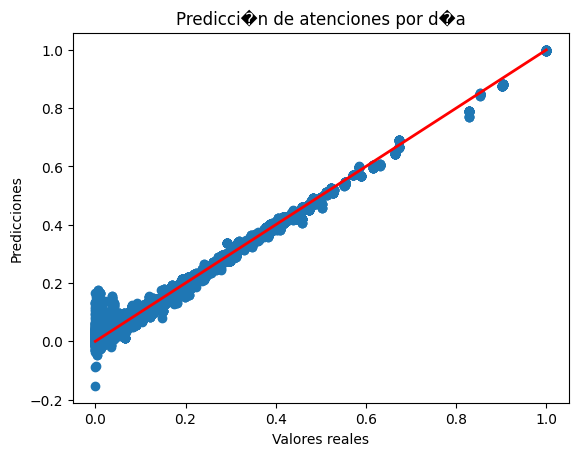

In [6]:
X = dataset.drop('atenciones_por_dia', axis=1)
y = dataset['atenciones_por_dia']
# Separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Realizar modelo de XGBOOST

from xgboost import XGBRegressor

# Definir el modelo
modelXGB = XGBRegressor()
# Entrenar el modelo
modelXGB.fit(X_train, y_train)
# Predecir valores
y_pred = modelXGB.predict(X_test)
# Calcular el error cuadr�tico medio

#Metricas del modelo SVM
from sklearn.metrics import mean_absolute_error


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
#Metricas mae
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')
# Graficar la predicci�n vs el valor real
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='L�nea de referencia')  # L�nea de referencia
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicci�n de atenciones por d�a')
plt.show()


In [7]:

# Predicciones en el conjunto de entrenamiento
y_train_pred = modelXGB.predict(X_train)

# Calcular el error cuadr�tico medio en entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Imprimir las m�tricas para el conjunto de entrenamiento
print(f'Mean Squared Error (MSE) en entrenamiento: {mse_train}')
print(f'Root Mean Squared Error (RMSE) en entrenamiento: {rmse_train}')
print(f'R-squared (R2) en entrenamiento: {r2_train}')

Mean Squared Error (MSE) en entrenamiento: 0.00015646195220992033
Root Mean Squared Error (RMSE) en entrenamiento: 0.012508475215225889
R-squared (R2) en entrenamiento: 0.9913906997365007


### Light Gradient

In [8]:
dataset =  pd.read_csv('data/analytics/datasetEstudio-2020-2024MuestraEscalados.csv')
dataset.head()

,edad,anio,dia,mes,sector_ips,NombreIPS,estacion,atenciones_por_dia,pm25,dia_semana,festivo,temperatura,humedad,presion,p1,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna
0,0.816667,1.00,0.200000,0.454545,1.0,0.833333,1.0,0.021028,0.103545,1.0,0.0,0.762202,0.508594,0.790541,0.015789,0.376543,0.413793,0.007042,0.004032,0.0
1,0.358333,0.75,0.333333,0.363636,1.0,0.256410,1.0,0.011682,0.166548,1.0,0.0,0.637591,0.494922,0.702704,0.010526,0.135802,0.172414,0.510563,0.584677,0.0
2,0.700000,0.75,1.000000,0.545455,0.5,0.846154,0.5,0.007009,0.047407,0.5,0.0,0.720146,0.375000,0.318244,0.005263,0.432099,0.448276,0.292254,0.612903,0.5
3,0.541667,0.50,0.033333,0.636364,0.5,0.935897,0.5,0.032710,0.204610,0.5,0.0,0.084112,0.941406,0.298647,0.084211,0.259259,0.137931,0.598592,0.673387,0.5
4,0.016667,0.25,0.666667,1.000000,1.0,0.525641,1.0,0.009346,0.332200,0.5,0.0,0.478712,0.604492,0.656082,0.005263,0.135802,0.206897,0.478873,0.564516,0.0


In [9]:
X = dataset.drop('atenciones_por_dia', axis=1)
y = dataset['atenciones_por_dia']
# Separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1923
[LightGBM] [Info] Number of data points in the train set: 20097, number of used features: 19
[LightGBM] [Info] Start training from score 0.096562
Mean Squared Error (MSE): 0.0001638777275199485
Root Mean Squared Error (RMSE): 0.012801473646418544
R-squared (R2): 0.9909626830655013


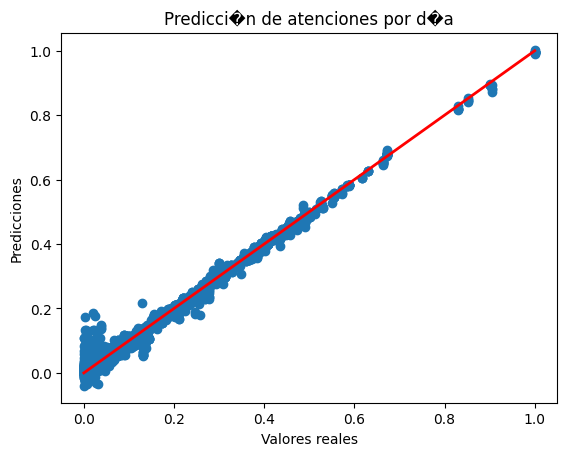

In [10]:
#Hacer modelo LightGradientBoost

from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=32, random_state=42)

lgbm.fit(X_train, y_train)

# Predecir sobre datos de prueba

y_pred = lgbm.predict(X_test)
# Evaluar el modelo
#Metricas del modelo SVM
from sklearn.metrics import mean_absolute_error


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
#Metricas mae
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')
# Graficar la predicci�n vs el valor real
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='L�nea de referencia')  # L�nea de referencia
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicci�n de atenciones por d�a')
plt.show()

In [11]:

# Predicciones en el conjunto de entrenamiento
y_train_pred = lgbm.predict(X_train)

# Calcular el error cuadr�tico medio en entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Imprimir las m�tricas para el conjunto de entrenamiento
print(f'Mean Squared Error (MSE) en entrenamiento: {mse_train}')
print(f'Root Mean Squared Error (RMSE) en entrenamiento: {rmse_train}')
print(f'R-squared (R2) en entrenamiento: {r2_train}')





Mean Squared Error (MSE) en entrenamiento: 9.350669524206114e-05
Root Mean Squared Error (RMSE) en entrenamiento: 0.009669885999434592
R-squared (R2) en entrenamiento: 0.9946966281028714


Datos totales 

In [12]:
dataset =  pd.read_csv('data/analytics/datasetEstudio-2020-2024Escalados.csv')
dataset.head()

,edad,anio,dia,mes,sector_ips,NombreIPS,estacion,atenciones_por_dia,pm25,dia_semana,festivo,temperatura,humedad,presion,p1,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna
0,0.658333,0.00,0.666667,0.090909,0.5,0.551282,0.5,0.224299,0.470346,1.0,0.0,0.188993,0.824805,0.225001,0.231579,0.456790,0.310345,0.735915,0.806452,0.5
1,0.733333,0.75,0.166667,0.727273,1.0,0.397436,1.0,0.299065,0.133948,0.5,0.0,0.917965,0.106055,0.702703,0.000000,0.259259,0.344828,0.341549,0.491935,0.0
2,0.741667,1.00,0.133333,0.545455,1.0,0.397436,1.0,0.329439,0.140723,1.0,0.0,0.481828,0.593262,0.809460,0.015789,0.000000,0.000000,0.489437,0.576613,0.0
3,0.533333,0.25,0.333333,0.363636,1.0,0.756410,1.0,0.105140,0.044797,0.5,0.0,0.679128,0.394531,0.635136,0.000000,0.308642,0.379310,0.170775,0.223790,0.0
4,0.725000,0.75,0.700000,0.272727,1.0,0.397436,1.0,0.334112,0.087805,0.0,0.0,0.461059,0.633984,0.668919,0.010526,0.197531,0.241379,0.450704,0.572581,0.0


In [13]:
X = dataset.drop('atenciones_por_dia', axis=1)
y = dataset['atenciones_por_dia']
# Separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004272 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1942
[LightGBM] [Info] Number of data points in the train set: 66989, number of used features: 19
[LightGBM] [Info] Start training from score 0.098336
Mean Squared Error (MSE): 0.000100951613471363
Root Mean Squared Error (RMSE): 0.010047468012955453
R-squared (R2): 0.9943229101083844


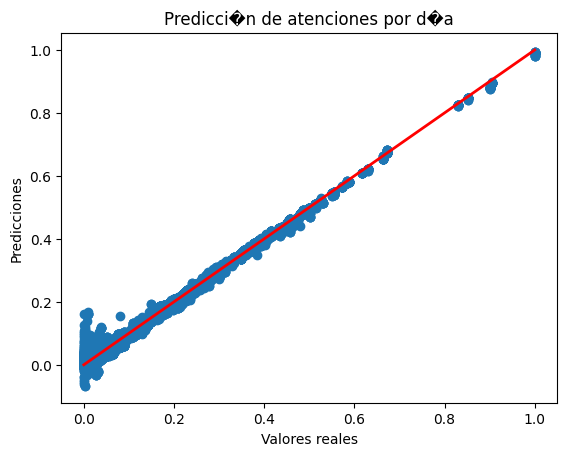

In [14]:
#Hacer modelo LightGradientBoost

from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=32, random_state=42)

lgbm.fit(X_train, y_train)

# Predecir sobre datos de prueba

y_pred = lgbm.predict(X_test)
# Evaluar el modelo
#Metricas del modelo SVM
from sklearn.metrics import mean_absolute_error


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
#Metricas mae
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')
# Graficar la predicci�n vs el valor real
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='L�nea de referencia')  # L�nea de referencia
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicci�n de atenciones por d�a')
plt.show()

In [15]:

# Predicciones en el conjunto de entrenamiento
y_train_pred = lgbm.predict(X_train)

# Calcular el error cuadr�tico medio en entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Imprimir las m�tricas para el conjunto de entrenamiento
print(f'Mean Squared Error (MSE) en entrenamiento: {mse_train}')
print(f'Root Mean Squared Error (RMSE) en entrenamiento: {rmse_train}')
print(f'R-squared (R2) en entrenamiento: {r2_train}')





Mean Squared Error (MSE) en entrenamiento: 8.668991328432774e-05
Root Mean Squared Error (RMSE) en entrenamiento: 0.00931074182245044
R-squared (R2) en entrenamiento: 0.9952298978586172


### RandomForest

In [16]:
dataset =  pd.read_csv('data/analytics/datasetEstudio-2020-2024MuestraEscalados.csv')
dataset.head()

,edad,anio,dia,mes,sector_ips,NombreIPS,estacion,atenciones_por_dia,pm25,dia_semana,festivo,temperatura,humedad,presion,p1,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna
0,0.816667,1.00,0.200000,0.454545,1.0,0.833333,1.0,0.021028,0.103545,1.0,0.0,0.762202,0.508594,0.790541,0.015789,0.376543,0.413793,0.007042,0.004032,0.0
1,0.358333,0.75,0.333333,0.363636,1.0,0.256410,1.0,0.011682,0.166548,1.0,0.0,0.637591,0.494922,0.702704,0.010526,0.135802,0.172414,0.510563,0.584677,0.0
2,0.700000,0.75,1.000000,0.545455,0.5,0.846154,0.5,0.007009,0.047407,0.5,0.0,0.720146,0.375000,0.318244,0.005263,0.432099,0.448276,0.292254,0.612903,0.5
3,0.541667,0.50,0.033333,0.636364,0.5,0.935897,0.5,0.032710,0.204610,0.5,0.0,0.084112,0.941406,0.298647,0.084211,0.259259,0.137931,0.598592,0.673387,0.5
4,0.016667,0.25,0.666667,1.000000,1.0,0.525641,1.0,0.009346,0.332200,0.5,0.0,0.478712,0.604492,0.656082,0.005263,0.135802,0.206897,0.478873,0.564516,0.0


In [17]:
X = dataset.drop('atenciones_por_dia', axis=1)
y = dataset['atenciones_por_dia']
# Separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Mean Squared Error (MSE): 5.958866116506749e-05
Root Mean Squared Error (RMSE): 0.007719369220672599
R-squared (R2): 0.9967138815945222


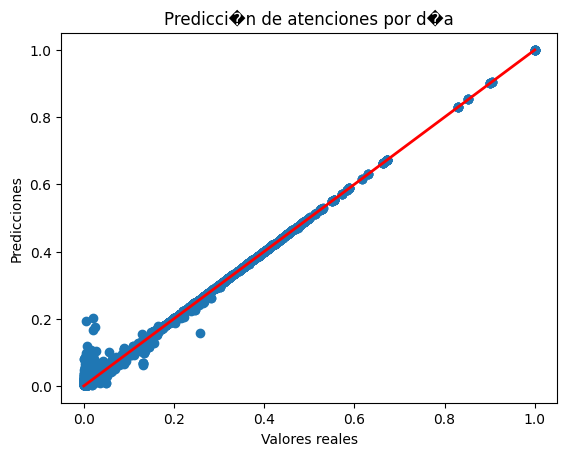

In [18]:
#Hacer modelo de randomforest

from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predecir con los datos de prueba

y_pred = rf_model.predict(X_test)

# Evaluar el modelo
#Metricas del modelo SVM
from sklearn.metrics import mean_absolute_error


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
#Metricas mae
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')
# Graficar la predicci�n vs el valor real
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='L�nea de referencia')  # L�nea de referencia
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicci�n de atenciones por d�a')
plt.show()

In [19]:

# Predicciones en el conjunto de entrenamiento
y_train_pred = rf_model.predict(X_train)

# Calcular el error cuadr�tico medio en entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Imprimir las m�tricas para el conjunto de entrenamiento
print(f'Mean Squared Error (MSE) en entrenamiento: {mse_train}')
print(f'Root Mean Squared Error (RMSE) en entrenamiento: {rmse_train}')
print(f'R-squared (R2) en entrenamiento: {r2_train}')





Mean Squared Error (MSE) en entrenamiento: 9.026721997795368e-06
Root Mean Squared Error (RMSE) en entrenamiento: 0.0030044503653406172
R-squared (R2) en entrenamiento: 0.9994880359781471


### Tablar con los resultados de cada modelo

In [25]:
#Se crea un dataframe y se define las columnas
metrics_df = pd.DataFrame(columns=['Modelo', 'R²', 'MSE', 'RMSE', 'MAE'])
# Diccionario para almacenar las predicciones por modelo
pred_dict = {}
# Lista de modelos entrenados
models = {
    'Modelo Xgboost': modelXGB,
    'Modelo Light Gradient': lgbm,
    'Modelo Random Forest': rf_model
}

# Evaluar cada modelo
for model_name, model in models.items():
    # Hacer predicciones
    y_pred = model.predict(X_test)

    
    # Calcular las métricas
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Crear un DataFrame para las métricas del modelo actual
    model_metrics = pd.DataFrame([{
        'Modelo': model_name,
        'R²': r2,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae
    }])
    
    # Concatenar el DataFrame actual con el DataFrame de métricas
    metrics_df = pd.concat([metrics_df, model_metrics], ignore_index=True)
    # Almacenar las predicciones en el diccionario con una clave que seria el nombre del modelo
    pred_dict[f'y_pred_{model_name}'] = y_pred

# Mostrar la tabla de métricas
print(metrics_df)



C:\Users\USER\AppData\Local\Temp\ipykernel_20612\597904037.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([metrics_df, model_metrics], ignore_index=True)


                  Modelo        R²       MSE      RMSE       MAE
0         Modelo Xgboost  0.989937  0.000182  0.013508  0.009383
1  Modelo Light Gradient  0.994561  0.000099  0.009931  0.006855
2   Modelo Random Forest  0.996714  0.000060  0.007719  0.002928


Diccionario con las prediciciones de cada modelo

In [26]:
pred_dict

{'y_pred_Modelo Xgboost': array([0.12058345, 0.3160324 , 0.01160023, ..., 0.03802103, 0.04357991,
        0.00904205], dtype=float32),
 'y_pred_Modelo Light Gradient': array([0.12825596, 0.31863753, 0.01398008, ..., 0.04181057, 0.03421264,
        0.01034898]),
 'y_pred_Modelo Random Forest': array([0.13658879, 0.32943925, 0.01932243, ..., 0.05254673, 0.03787383,
        0.01098131])}

Se desescalan las predciones

In [32]:
# Desescalar las predicciones Modelos
import joblib
scaler = joblib.load('data/analytics/scaler.pkl')


# Acceder a las predicciones de cada modelo desde el diccionario
y_pred_XGBoost = pred_dict['y_pred_Modelo Xgboost']
y_pred_lgbm = pred_dict['y_pred_Modelo Light Gradient']
y_pred_rf = pred_dict['y_pred_Modelo Random Forest']

# Se asegura que esten la forma correcta de este scaler
y_pred_XGBoost = y_pred_XGBoost.reshape(-1, 1)  # Forma (n_samples, 1)
y_pred_lgbm = y_pred_lgbm.reshape(-1, 1)
y_pred_rf = y_pred_rf.reshape(-1, 1)


In [34]:
# Crear una matriz vacía con el número de columnas de entrenamiento
n_features = scaler.scale_.shape[0]  # Número de columnas que el escalador fue entrenado
n_features

20

In [ ]:
pred_matrix = np.zeros((y_pred_XGBoost.shape[0], n_features))  # Crear la matriz vacía con zeros pero que sea el tamaño de los y_pred
#de los modelos y con 20 que son las 20 características con las que el scaler se escalo

# Colocar las predicciones en la columna 7 (ya que la variable objetivo está en la columna 7 que es atenciones_por_dia)
pred_matrix[:, 7] = y_pred_XGBoost.flatten()
# Desescalar la matriz de predicciones para el primer modelo
y_pred_descaled_matrix = scaler.inverse_transform(pred_matrix)
# Extraer la columna desescalada (la columna 7 que corresponde a tu variable objetivo)
y_pred_descaledXGBoost = y_pred_descaled_matrix[:, 7]

# Hacer lo mismo para los otros modelos:
pred_matrix[:, 7] = y_pred_lgbm.flatten()
y_pred_descaledLGBM = scaler.inverse_transform(pred_matrix)[:, 7]

pred_matrix[:, 7] = y_pred_rf.flatten()
y_pred_descaledRF = scaler.inverse_transform(pred_matrix)[:, 7]

# Mostrar las predicciones desescaladas
print("Predicciones desescaladas XGBoost:", y_pred_descaledXGBoost)
print("Predicciones desescaladas LGBM:", y_pred_descaledLGBM)
print("Predicciones desescaladas Random Forest:", y_pred_descaledRF)

# # Desescalar los valores reales (si es necesario)
# y_test_descaledModelos = scaler.inverse_transform(y_test.reshape(-1, 1))

Predicciones desescaladas XGBoost: [ 52.60971758 136.26187134   5.96489959 ...  17.273       19.65220146
   4.86999889]
Predicciones desescaladas LGBM: [ 55.89354917 137.37686344   6.98347405 ...  18.89492361  15.6430078
   5.42936329]
Predicciones desescaladas Random Forest: [ 59.46 142.     9.27 ...  23.49  17.21   5.7 ]


In [39]:
# Convertir y_test a un array de NumPy y luego hacer reshape
y_test = y_test.to_numpy().reshape(-1, 1)  # Ahora puedes usar reshape en el array

# Crear una matriz vacía con el número de columnas que tiene el conjunto de datos original
n_features = scaler.scale_.shape[0]  # Número de columnas que el escalador fue entrenado
test_matrix = np.zeros((y_test.shape[0], n_features))  # Crear la matriz vacía

# Colocar y_test en la columna 7 (ya que la variable objetivo está en la columna 7)
test_matrix[:, 7] = y_test.flatten()

# Desescalar la matriz de y_test
y_test_descaled_matrix = scaler.inverse_transform(test_matrix)

# Extraer la columna 7 desescalada (la columna 7 que corresponde a tu variable objetivo)
y_test_descaled = y_test_descaled_matrix[:, 7]

# Mostrar los valores reales desescalados
print("Valores reales desescalados (y_test):", y_test_descaled)

Valores reales desescalados (y_test): [ 60. 142.  10. ...  24.   7.   3.]


### Matriz de confusion

In [52]:
y_pred_descaledRF.min()

np.float64(1.6799999999999913)

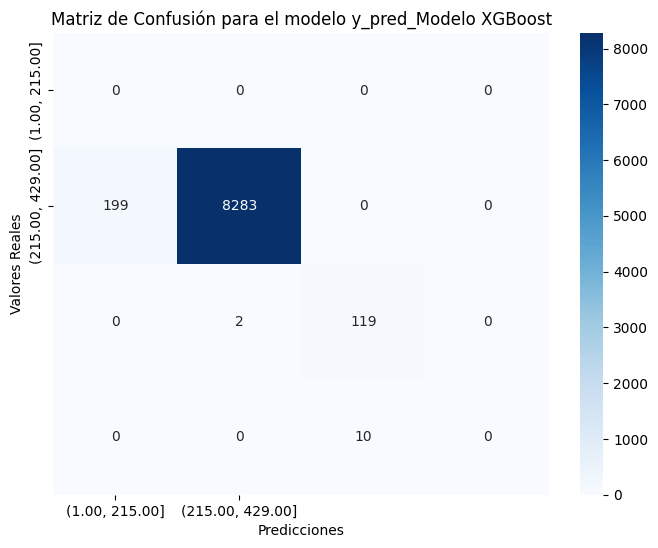

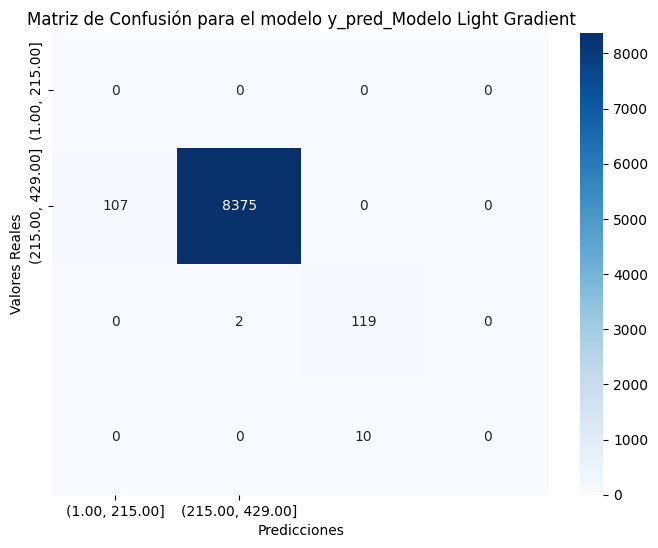

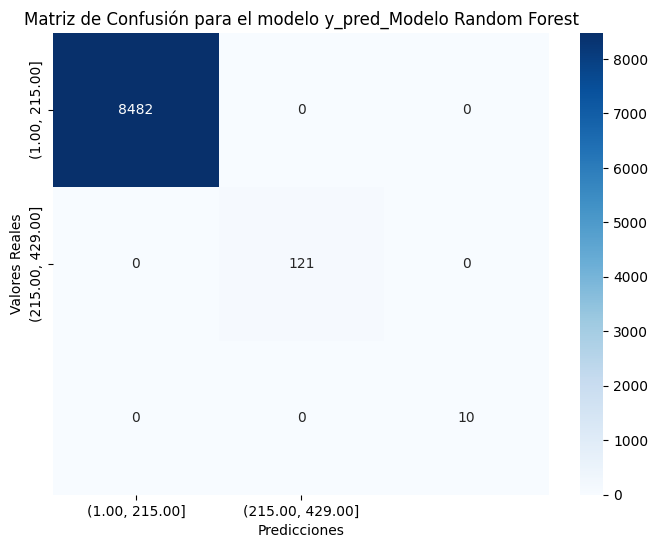

In [53]:
#Discretizamos para poder hacer la matriz de confusion
#Para ello primero se debe definir los bins (intervalos) para discretizar los valores
bins = np.linspace(start=min(y_test_descaled.min(), y_pred_descaledRF.min()), 
                   stop=max(y_test_descaled.max(), y_pred_descaledXGBoost.max()), 
                   num=3)  # Ajusta el número de bins según lo que necesites

# Crear etiquetas con los rangos de los bins
bin_labels = [f"({bins[i]:.2f}, {bins[i+1]:.2f}]" for i in range(len(bins)-1)]

# Diccionario con las predicciones de cada modelo
pred_dict = {
    'y_pred_Modelo XGBoost': y_pred_descaledXGBoost,
    'y_pred_Modelo Light Gradient': y_pred_descaledLGBM,
    'y_pred_Modelo Random Forest': y_pred_descaledRF
}

# Crear un gráfico de la matriz de confusión para cada modelo
for model_name, y_pred in pred_dict.items():
    y_pred_descaled = y_pred 

    # Discretizar las predicciones y los valores reales
    y_test_discretized = np.digitize(y_test_descaled, bins)  # Para valores reales
    y_pred_discretized = np.digitize(y_pred_descaled, bins)  # Para las predicciones del modelo actual

    # Crear la matriz de confusión
    cm = confusion_matrix(y_test_discretized, y_pred_discretized)

    # Visualizar la matriz de confusión con un heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=bin_labels, yticklabels=bin_labels)
    plt.xlabel('Predicciones')
    plt.ylabel('Valores Reales')
    plt.title(f'Matriz de Confusión para el modelo {model_name}')
    plt.show()